# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score, classification_report

# Exploratory Data Analysis

In [2]:
raw_data = pd.read_excel('Dataset 1 Patient 26.xlsx')
raw_data.sample(5)

,Emg1,Emg2,Emg3,Emg4,Emg5,Emg6,Emg7,Emg8,Emg9,Emg10,repetition,rerepetition,stimulus,restimulus
426292,0.3027,0.0049,0.0049,0.0024,0.0049,0.0049,0.0513,0.0171,0.0024,0.0049,0,0,0,0
112845,0.2075,0.0024,0.0049,0.1538,0.0049,0.0024,0.3784,0.8032,0.0024,0.3101,0,0,0,0
227162,0.1172,0.0049,0.0024,0.1099,0.0049,0.0024,0.0806,0.1709,0.0024,0.0708,9,0,15,0
292176,0.0024,0.0049,0.0024,0.0024,0.0049,0.0024,0.0024,0.0024,0.0049,0.0317,1,0,6,0
8006,0.5273,0.1099,0.1025,0.0049,0.0024,0.0073,0.2637,0.6177,0.1001,0.1587,10,10,1,1


In [3]:
raw_data.shape

(463778, 14)

In [4]:
raw_data.columns

Index(['Emg1', 'Emg2', 'Emg3', 'Emg4', 'Emg5', 'Emg6', 'Emg7', 'Emg8', 'Emg9',
       'Emg10', 'repetition', 'rerepetition', 'stimulus', 'restimulus'],
      dtype='object')

In [5]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 463778 entries, 0 to 463777
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Emg1          463778 non-null  float64
 1   Emg2          463778 non-null  float64
 2   Emg3          463778 non-null  float64
 3   Emg4          463778 non-null  float64
 4   Emg5          463778 non-null  float64
 5   Emg6          463778 non-null  float64
 6   Emg7          463778 non-null  float64
 7   Emg8          463778 non-null  float64
 8   Emg9          463778 non-null  float64
 9   Emg10         463778 non-null  float64
 10  repetition    463778 non-null  int64  
 11  rerepetition  463778 non-null  int64  
 12  stimulus      463778 non-null  int64  
 13  restimulus    463778 non-null  int64  
dtypes: float64(10), int64(4)
memory usage: 49.5 MB


In [6]:
raw_data.describe(include='all')

,Emg1,Emg2,Emg3,Emg4,Emg5,Emg6,Emg7,Emg8,Emg9,Emg10,repetition,rerepetition,stimulus,restimulus
count,463778.000000,463778.00000,463778.000000,463778.000000,463778.000000,463778.000000,463778.000000,463778.000000,463778.000000,463778.000000,463778.000000,463778.000000,463778.000000,463778.000000
mean,0.370431,0.09488,0.171677,0.133734,0.017742,0.039629,0.337346,0.418753,0.091687,0.227919,3.200486,2.111698,5.672708,3.792519
std,0.579287,0.25710,0.487344,0.359362,0.062053,0.131240,0.602700,0.643606,0.290849,0.426220,3.487157,3.228558,6.589330,6.134340
min,0.002400,0.00240,0.002400,0.002400,0.002400,0.002400,0.002400,0.002400,0.002400,0.002400,0.000000,0.000000,0.000000,0.000000
25%,0.029300,0.00240,0.004900,0.002400,0.002400,0.002400,0.036600,0.009800,0.002400,0.014600,0.000000,0.000000,0.000000,0.000000
50%,0.151400,0.00490,0.004900,0.004900,0.004900,0.004900,0.131800,0.117200,0.004900,0.078100,2.000000,0.000000,3.000000,0.000000
75%,0.388200,0.04880,0.063500,0.092800,0.004900,0.024400,0.349100,0.600600,0.048800,0.224600,6.000000,4.000000,10.000000,7.000000
max,4.646000,4.64360,4.641100,4.643600,1.984900,4.643600,4.643600,4.646000,4.638700,4.638700,10.000000,10.000000,23.000000,23.000000


In [7]:
print("Unique Dependent values and their counts :")
print(raw_data["stimulus"].value_counts())

Unique Dependent values and their counts :
0     193905
4      15609
12     15605
7      15602
8      15602
2      15599
11     15574
5      15570
6      15561
9      15554
10     15531
3      15530
1      15524
14     10407
17     10406
13     10402
15     10367
16     10334
18      5203
21      5202
19      5200
23      5166
20      5163
22      5162
Name: stimulus, dtype: int64


Text(0, 0.5, 'Frequency')

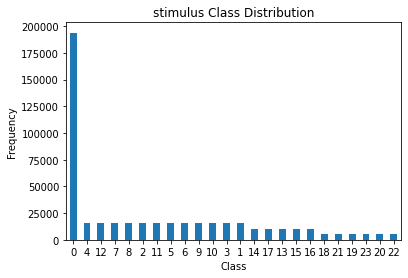

In [8]:
count_classes = pd.value_counts(raw_data['stimulus'], sort = True)

count_classes.plot(kind = 'bar', rot=0)

plt.title("stimulus Class Distribution")

plt.xlabel("Class")

plt.ylabel("Frequency")

# Data Cleaning and Exploratory Data Analysis with New Data

In [9]:
index_names = raw_data[ (raw_data['stimulus'] != raw_data['restimulus'])].index
raw_data.drop(index_names, inplace = True)

In [10]:
index_names = raw_data[ (raw_data['repetition'] != raw_data['rerepetition'])].index
raw_data.drop(index_names, inplace = True)

In [11]:
raw_data.sample(5)

,Emg1,Emg2,Emg3,Emg4,Emg5,Emg6,Emg7,Emg8,Emg9,Emg10,repetition,rerepetition,stimulus,restimulus
286888,0.1611,0.0464,0.0049,0.0049,0.0049,0.0049,0.0073,0.0073,0.0049,0.0879,0,0,0,0
194535,0.4272,0.1709,0.2979,0.6909,0.0659,0.0098,0.1270,0.5640,0.0732,0.2466,10,10,11,11
255951,0.2661,0.0049,0.0049,0.0024,0.0024,0.0024,0.1221,0.0928,0.0024,0.0220,0,0,0,0
309380,0.2539,0.0024,0.0049,0.0171,0.0049,0.0195,0.6445,0.9009,0.0024,0.5127,10,10,7,7
391440,0.0195,0.0024,0.0049,0.0024,0.0024,0.0024,0.0024,0.0024,0.0049,0.0781,0,0,0,0


In [12]:
raw_data.shape

(364904, 14)

In [13]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 364904 entries, 0 to 463777
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Emg1          364904 non-null  float64
 1   Emg2          364904 non-null  float64
 2   Emg3          364904 non-null  float64
 3   Emg4          364904 non-null  float64
 4   Emg5          364904 non-null  float64
 5   Emg6          364904 non-null  float64
 6   Emg7          364904 non-null  float64
 7   Emg8          364904 non-null  float64
 8   Emg9          364904 non-null  float64
 9   Emg10         364904 non-null  float64
 10  repetition    364904 non-null  int64  
 11  rerepetition  364904 non-null  int64  
 12  stimulus      364904 non-null  int64  
 13  restimulus    364904 non-null  int64  
dtypes: float64(10), int64(4)
memory usage: 41.8 MB


In [14]:
print(raw_data.isnull().any())

Emg1            False
Emg2            False
Emg3            False
Emg4            False
Emg5            False
Emg6            False
Emg7            False
Emg8            False
Emg9            False
Emg10           False
repetition      False
rerepetition    False
stimulus        False
restimulus      False
dtype: bool


In [15]:
X = raw_data.iloc[:,0:10]
y = raw_data.stimulus

# Scalling Data

In [16]:
from sklearn.preprocessing import StandardScaler

In [17]:
X = StandardScaler().fit_transform(X)

# Indipendent Component Analysis (ICA)

https://www.nmr.mgh.harvard.edu/mne/0.14/manual/preprocessing/ica.html

In [18]:
from sklearn.decomposition import FastICA

ica = FastICA(n_components=10)
X_ica = ica.fit_transform(X)

In [19]:
# Splitting data for training and testing
X_train, X_test, y_train, y_test = train_test_split(X_ica, y, test_size = 0.2, random_state = 39)

# Machine Learning Models

In [20]:
from sklearn import tree
tree = tree.DecisionTreeClassifier()
tree.fit(X_train, y_train)

DecisionTreeClassifier()

In [21]:
y_pred1 = tree.predict(X_test)

In [22]:
from sklearn.metrics import accuracy_score
accuracy = {accuracy_score(y_test, y_pred1)}
print(f"Accuracy is: {accuracy_score(y_test, y_pred1)* 100}")

Accuracy is: 86.28273112179883


Classification report : 
               precision    recall  f1-score   support

           0       0.95      0.95      0.95     38104
           1       0.79      0.82      0.80      2099
           2       0.83      0.83      0.83      1914
           3       0.80      0.81      0.80      2255
           4       0.82      0.84      0.83      1818
           5       0.82      0.83      0.82      1809
           6       0.82      0.82      0.82      1892
           7       0.78      0.79      0.78      1918
           8       0.76      0.74      0.75      1790
           9       0.68      0.67      0.67      2140
          10       0.62      0.64      0.63      2007
          11       0.74      0.73      0.74      1897
          12       0.74      0.74      0.74      1891
          13       0.79      0.77      0.78      1233
          14       0.74      0.74      0.74      1292
          15       0.81      0.79      0.80      1372
          16       0.82      0.82      0.82      1510
 

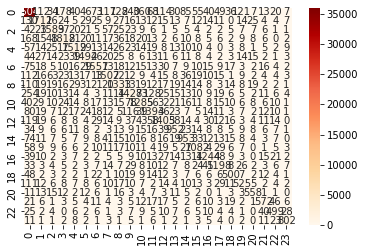

In [23]:
print('\033[1m' +'Classification report : '+ '\033[0m\n', classification_report(y_test, y_pred1))

cm = confusion_matrix(y_pred1, y_test)
print('\033[1m' +'Confusion Matrix : '+ '\033[0m')
sns.heatmap(cm, cmap = 'OrRd',annot = True, fmt='d')
plt.show()

# Evaluation -- Decision Tree

In [24]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test,y_pred1))
print('MSE:', metrics.mean_squared_error(y_test, y_pred1))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred1)))

MAE: 0.997191049725271
MSE: 10.982173442402818
RMSE: 3.3139362459774055


In [25]:
from sklearn.metrics import precision_score
print("Precision Score : ",precision_score(y_test, y_pred1, average='weighted'))


from sklearn.metrics import recall_score
print("Recall Score : ",recall_score(y_test, y_pred1,average='weighted'))


from sklearn.metrics import f1_score
print("f1_score : ",f1_score(y_test, y_pred1,average='weighted'))

Precision Score :  0.8631256455749645
Recall Score :  0.8628273112179883
f1_score :  0.8629537521309962


# KNeighborsClassifier

In [26]:
from sklearn.neighbors import KNeighborsClassifier
KNeighborsClassifier = KNeighborsClassifier()
KNeighborsClassifier.fit(X_train, y_train)

KNeighborsClassifier()

In [27]:
y_pred2 = KNeighborsClassifier.predict(X_test)

In [28]:
from sklearn.metrics import accuracy_score
accuracy = {accuracy_score(y_test, y_pred2)}
print(f"Accuracy is: {accuracy_score(y_test, y_pred2)* 100}")

Accuracy is: 93.47227360545895


Classification report : 
               precision    recall  f1-score   support

           0       0.94      0.99      0.97     38104
           1       0.92      0.92      0.92      2099
           2       0.94      0.92      0.93      1914
           3       0.93      0.89      0.91      2255
           4       0.94      0.92      0.93      1818
           5       0.92      0.91      0.92      1809
           6       0.94      0.91      0.93      1892
           7       0.91      0.88      0.89      1918
           8       0.92      0.85      0.88      1790
           9       0.86      0.78      0.82      2140
          10       0.92      0.72      0.80      2007
          11       0.92      0.88      0.90      1897
          12       0.92      0.87      0.89      1891
          13       0.95      0.91      0.93      1233
          14       0.90      0.85      0.87      1292
          15       0.93      0.89      0.91      1372
          16       0.95      0.91      0.93      1510
 

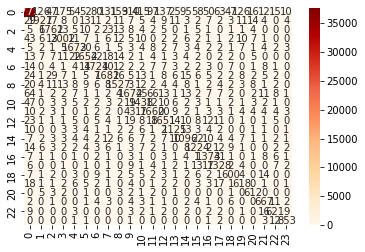

In [29]:
print('\033[1m' +'Classification report : '+ '\033[0m\n', classification_report(y_test, y_pred2))

cm = confusion_matrix(y_pred2, y_test)
print('\033[1m' +'Confusion Matrix : '+ '\033[0m')
sns.heatmap(cm, cmap = 'OrRd',annot = True, fmt='d')
plt.show()

# Evaluation -- KNeighborsClassifier

In [30]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test,y_pred2))
print('MSE:', metrics.mean_squared_error(y_test, y_pred2))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred2)))

MAE: 0.5068168427398912
MSE: 5.78662939669229
RMSE: 2.405541393676752


In [31]:
from sklearn.metrics import precision_score
print("Precision Score : ",precision_score(y_test, y_pred2, average='weighted'))


from sklearn.metrics import recall_score
print("Recall Score : ",recall_score(y_test, y_pred2,average='weighted'))


from sklearn.metrics import f1_score
print("f1_score : ",f1_score(y_test, y_pred2,average='weighted'))

Precision Score :  0.9340888204222338
Recall Score :  0.9347227360545896
f1_score :  0.9334572294494259


# ExtraTreesClassifier

In [32]:
from sklearn.ensemble import ExtraTreesClassifier
extratree = ExtraTreesClassifier()
extratree.fit(X_train, y_train)

ExtraTreesClassifier()

In [33]:
y_pred5 = extratree.predict(X_test)

In [34]:
from sklearn.metrics import accuracy_score
accuracy = {accuracy_score(y_test, y_pred5)}
print(f"Accuracy is: {accuracy_score(y_test, y_pred5)* 100}")

Accuracy is: 94.88085940176211


Classification report : 
               precision    recall  f1-score   support

           0       0.94      1.00      0.97     38104
           1       0.96      0.92      0.94      2099
           2       0.97      0.94      0.96      1914
           3       0.96      0.90      0.93      2255
           4       0.98      0.94      0.96      1818
           5       0.96      0.95      0.95      1809
           6       0.98      0.92      0.95      1892
           7       0.95      0.90      0.93      1918
           8       0.96      0.87      0.91      1790
           9       0.91      0.79      0.85      2140
          10       0.95      0.74      0.83      2007
          11       0.95      0.89      0.92      1897
          12       0.95      0.89      0.92      1891
          13       0.98      0.95      0.97      1233
          14       0.94      0.88      0.91      1292
          15       0.96      0.92      0.94      1372
          16       0.98      0.95      0.96      1510
 

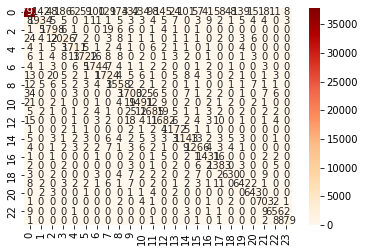

In [35]:
print('\033[1m' +'Classification report : '+ '\033[0m\n', classification_report(y_test, y_pred5))

cm = confusion_matrix(y_pred5, y_test)
print('\033[1m' +'Confusion Matrix : '+ '\033[0m')
sns.heatmap(cm, cmap = 'OrRd',annot = True, fmt='d')
plt.show()

# Evaluation -- ExtraTreesClassifier

In [36]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test,y_pred5))
print('MSE:', metrics.mean_squared_error(y_test, y_pred5))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred5)))

MAE: 0.4195064468834354
MSE: 4.867239418478782
RMSE: 2.2061820909613923


In [37]:
from sklearn.metrics import precision_score
print("Precision Score : ",precision_score(y_test, y_pred5, average='weighted'))


from sklearn.metrics import recall_score
print("Recall Score : ",recall_score(y_test, y_pred5,average='weighted'))


from sklearn.metrics import f1_score
print("f1_score : ",f1_score(y_test, y_pred5,average='weighted'))

Precision Score :  0.949193577057856
Recall Score :  0.9488085940176211
f1_score :  0.9477854222640042


# Random Forest

In [38]:
from sklearn.ensemble import RandomForestClassifier
RandomForestClassifier = RandomForestClassifier()
RandomForestClassifier.fit(X_train, y_train)

RandomForestClassifier()

In [39]:
y_pred3 = RandomForestClassifier.predict(X_test)

In [40]:
from sklearn.metrics import accuracy_score
accuracy = {accuracy_score(y_test, y_pred3)}
print(f"Accuracy is: {accuracy_score(y_test, y_pred3)* 100}")

Accuracy is: 94.18752826078021


Classification report : 
               precision    recall  f1-score   support

           0       0.94      0.99      0.97     38104
           1       0.94      0.92      0.93      2099
           2       0.96      0.93      0.95      1914
           3       0.95      0.88      0.92      2255
           4       0.97      0.93      0.95      1818
           5       0.95      0.94      0.94      1809
           6       0.96      0.91      0.94      1892
           7       0.94      0.88      0.91      1918
           8       0.94      0.86      0.90      1790
           9       0.90      0.78      0.84      2140
          10       0.94      0.73      0.82      2007
          11       0.93      0.88      0.90      1897
          12       0.93      0.88      0.90      1891
          13       0.97      0.93      0.95      1233
          14       0.92      0.87      0.89      1292
          15       0.94      0.90      0.92      1372
          16       0.96      0.94      0.95      1510
 

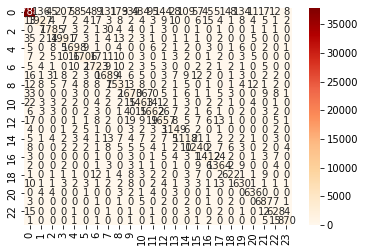

In [41]:
print('\033[1m' +'Classification report : '+ '\033[0m\n', classification_report(y_test, y_pred3))

cm = confusion_matrix(y_pred3, y_test)
print('\033[1m' +'Confusion Matrix : '+ '\033[0m')
sns.heatmap(cm, cmap = 'OrRd',annot = True, fmt='d')
plt.show()

# Evaluation -- Random Forest

In [42]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test,y_pred3))
print('MSE:', metrics.mean_squared_error(y_test, y_pred3))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred3)))

MAE: 0.4594894561598224
MSE: 5.252079308313123
RMSE: 2.2917415448329077


In [43]:
from sklearn.metrics import precision_score
print("Precision Score : ",precision_score(y_test, y_pred3, average='weighted'))


from sklearn.metrics import recall_score
print("Recall Score : ",recall_score(y_test, y_pred3,average='weighted'))


from sklearn.metrics import f1_score
print("f1_score : ",f1_score(y_test, y_pred3,average='weighted'))

Precision Score :  0.9418063170932961
Recall Score :  0.9418752826078021
f1_score :  0.940638126791478


# XGBoost

In [44]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_train, y_train)

E:\MachineLearning\envs\gpu\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
E:\MachineLearning\envs\gpu\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:43:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=12,
              num_parallel_tree=1, objective='multi:softprob', predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=None,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [45]:
y_pred4 = xgb.predict(X_test)

In [46]:
from sklearn.metrics import accuracy_score
accuracy = {accuracy_score(y_test, y_pred4)}
print(f"Accuracy is: {accuracy_score(y_test, y_pred4)* 100}")

Accuracy is: 90.68387662542305


Classification report : 
               precision    recall  f1-score   support

           0       0.93      0.99      0.96     38104
           1       0.89      0.86      0.87      2099
           2       0.92      0.89      0.90      1914
           3       0.90      0.82      0.86      2255
           4       0.91      0.89      0.90      1818
           5       0.90      0.89      0.90      1809
           6       0.92      0.85      0.89      1892
           7       0.86      0.82      0.84      1918
           8       0.87      0.78      0.82      1790
           9       0.83      0.70      0.76      2140
          10       0.88      0.66      0.75      2007
          11       0.84      0.80      0.82      1897
          12       0.85      0.79      0.82      1891
          13       0.91      0.85      0.88      1233
          14       0.83      0.77      0.80      1292
          15       0.87      0.83      0.85      1372
          16       0.91      0.87      0.89      1510
 

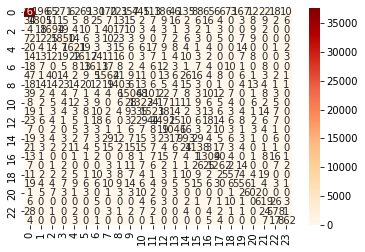

In [47]:
print('\033[1m' +'Classification report : '+ '\033[0m\n', classification_report(y_test, y_pred4))

cm = confusion_matrix(y_pred4, y_test)
print('\033[1m' +'Confusion Matrix : '+ '\033[0m')
sns.heatmap(cm, cmap = 'OrRd',annot = True, fmt='d')
plt.show()

# Evaluation -- XGBoost

In [48]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test,y_pred4))
print('MSE:', metrics.mean_squared_error(y_test, y_pred4))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred4)))

MAE: 0.6853701648374234
MSE: 7.694235485948398
RMSE: 2.773848497295481


In [49]:
from sklearn.metrics import precision_score
print("Precision Score : ",precision_score(y_test, y_pred4, average='weighted'))


from sklearn.metrics import recall_score
print("Recall Score : ",recall_score(y_test, y_pred4,average='weighted'))


from sklearn.metrics import f1_score
print("f1_score : ",f1_score(y_test, y_pred4,average='weighted'))

Precision Score :  0.9049892122894404
Recall Score :  0.9068387662542305
f1_score :  0.9044319057277778
